## Linear Regression
Anshurup gupta 2301Ai02

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
def mean_squared_error(Y_true, Y_pred):
    mse = (np.sum((Y_true - Y_pred) ** 2))
    return mse / (2 * len(Y_true))

def fit_linear_regression(X, y, lr = 0.5):
    num_data = len(X)
    w = np.random.rand(X.shape[1])
    #print(w)

    sample = 0

    while(sample < num_data):
        y_pred = predict(X[sample], w, False)
        #print(y_pred, y[sample])

        del_Err = y_pred - y[sample]
        #print(del_Err)

        del_W = lr * del_Err * X[sample]
        #print(del_W)

        w = w - del_W
        #print(w)

        sample += 1
    #print(w)
    return w

def predict(X, weights, test_data = True):
    if(test_data):
        return X @ weights
    return weights @ X

def plot_preds(X, Y_true, Y_pred):
    # plotting
    plt.title("Line graph") 
    plt.xlabel("Data") 
    plt.ylabel("price") 

    plt.scatter(X, Y_true, color = "green") 
    plt.scatter(X, Y_pred, color ="orange") 
    plt.legend(["Data", "prediction"])
    plt.show()

def normalize_features(X):
    #print(X / X.max(axis=0))
    return X / X.max(axis=0)

### Main body 

In [62]:
if __name__ == "__main__":
    # Load the train data
    train_data = pd.read_csv('train.csv')
    
    X_train = train_data[['carlength', 'carwidth', 'carheight', 'horsepower', 'peakrpm']].values
    y_train = train_data['price'].values

    test_data = pd.read_csv('test.csv')
    
    X_test = test_data[['carlength', 'carwidth', 'carheight', 'horsepower', 'peakrpm']].values
    y_test = test_data['price'].values

Mean Squared Error on Test Set: 10313785.283053063


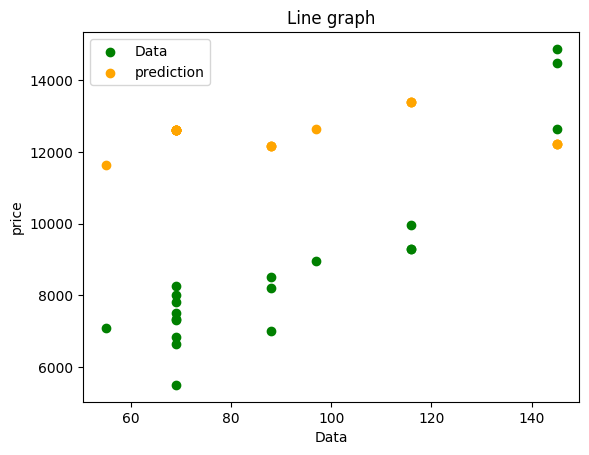

In [63]:
############# Without normailzed features ################
weights = fit_linear_regression(X_train, y_train, 1.0e-8)

y_pred = predict(X_test, weights)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

plot_preds(test_data['horsepower'].values, y_test, y_pred)

Mean Squared Error on Test Set: 1589202.228010734


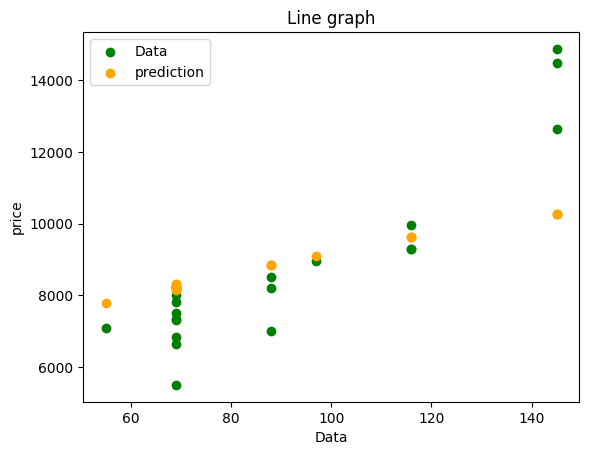

In [67]:
################### Normalize features ######################
X_train = normalize_features(X_train)

weights = fit_linear_regression(X_train, y_train)
X_test = normalize_features(X_test)

y_pred = predict(X_test, weights, 0.5)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

plot_preds(test_data['horsepower'].values, y_test, y_pred)